**Nombre:** Marlon Jhassir García Velásquez

**Identificación:** 1001445953

## Introducción 

En el presente documento se analizo una base de datos del sitio web https://www.kaggle.com/datasets en particular se tomo la siguiente: 

https://www.kaggle.com/gpreda/covid-world-vaccination-progress

La cual contiene los datos de como va la vacunación a nivel mundial dando los datos particulares de cada país, en particular se tomarón los datos de colombia y se creo un modelo que se ajuste a los datos obtenidos hasta el momento para dar una fecha aproximada de la terminación de este proceso.

## Librerias

In [1]:
#Librerias

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from datetime import date
from scipy import misc
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Analisis de los datos y Fit de estos

In [2]:
# Se leen los datos con Pandas

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Metodos_computacionales/Trabajo_Final/country_vaccinations.csv')
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52734,Zimbabwe,ZWE,2021-10-17,5701675.0,3221576.0,2480099.0,13717.0,17164.0,37.78,21.35,16.43,1137.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52735,Zimbabwe,ZWE,2021-10-18,5742988.0,3241469.0,2501519.0,41313.0,21169.0,38.05,21.48,16.57,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52736,Zimbabwe,ZWE,2021-10-19,5756747.0,3247552.0,2509195.0,13759.0,20610.0,38.14,21.52,16.63,1366.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52737,Zimbabwe,ZWE,2021-10-20,5780767.0,3257360.0,2523407.0,24020.0,21176.0,38.30,21.58,16.72,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [3]:
# Se filtran de manera que queden solo los datos de colombia

colombia = df[df.country == 'Colombia']
colombia 

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
9830,Colombia,COL,2021-02-17,18.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
9831,Colombia,COL,2021-02-18,9935.0,NaN,NaN,9917.0,9917.0,0.02,NaN,NaN,193.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
9832,Colombia,COL,2021-02-19,21307.0,NaN,NaN,11372.0,10644.0,0.04,NaN,NaN,208.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
9833,Colombia,COL,2021-02-20,33140.0,NaN,NaN,11833.0,11041.0,0.06,NaN,NaN,215.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
9834,Colombia,COL,2021-02-21,39827.0,NaN,NaN,6687.0,9952.0,0.08,NaN,NaN,194.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,Colombia,COL,2021-10-14,44137117.0,28433989.0,19370919.0,255399.0,255406.0,86.09,55.46,37.79,4982.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
10070,Colombia,COL,2021-10-15,44350661.0,28647533.0,19370919.0,213544.0,245109.0,86.51,55.88,37.79,4781.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
10071,Colombia,COL,2021-10-16,NaN,NaN,NaN,NaN,231440.0,NaN,NaN,NaN,4515.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
10072,Colombia,COL,2021-10-17,44660557.0,28697781.0,19724680.0,NaN,236150.0,87.12,55.98,38.48,4606.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...


In [4]:
# Se eliminan las filas con NaN pues remplazar estas por 0 nos daría mas errores a futuro

colombia = colombia[colombia['people_fully_vaccinated'].notna()]
colombia

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
9854,Colombia,COL,2021-03-13,782301.0,749059.0,33242.0,88811.0,73127.0,1.53,1.46,0.06,1426.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
9855,Colombia,COL,2021-03-14,843204.0,803656.0,39548.0,60903.0,77686.0,1.64,1.57,0.08,1515.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
9856,Colombia,COL,2021-03-15,913961.0,868994.0,44967.0,70757.0,85412.0,1.78,1.70,0.09,1666.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
9857,Colombia,COL,2021-03-16,976137.0,928927.0,47210.0,62176.0,81863.0,1.90,1.81,0.09,1597.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
9858,Colombia,COL,2021-03-17,1024358.0,971240.0,53118.0,48221.0,77730.0,2.00,1.89,0.10,1516.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10068,Colombia,COL,2021-10-13,43881718.0,28300881.0,19199704.0,273573.0,263158.0,85.60,55.20,37.45,5133.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
10069,Colombia,COL,2021-10-14,44137117.0,28433989.0,19370919.0,255399.0,255406.0,86.09,55.46,37.79,4982.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
10070,Colombia,COL,2021-10-15,44350661.0,28647533.0,19370919.0,213544.0,245109.0,86.51,55.88,37.79,4781.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...
10072,Colombia,COL,2021-10-17,44660557.0,28697781.0,19724680.0,NaN,236150.0,87.12,55.98,38.48,4606.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://docs.google.com/spreadsheets/d/1eblBeo...


In [5]:
#Se transforma la diferencia de fechas a horas

def diff_dates(date1, date2):      #Funcion para la diferencia 
    return abs(date2-date1).days

f1 = date(2021,2,17)               # fecha inicial
f2 = date(2021,10,18)              # fecha final de los datos
result1 = diff_dates(f2, f1)       # Numero de días 
horas = result1 * 24               # Nuero de horas 

tiempo = np.linspace(0,horas,len(colombia['date']))  # Intervalo de tiempo en horas

print('{} días entre {} y {} y hay {} horas'.format(result1, f1, f2,horas))


243 días entre 2021-02-17 y 2021-10-18 y hay 5832 horas


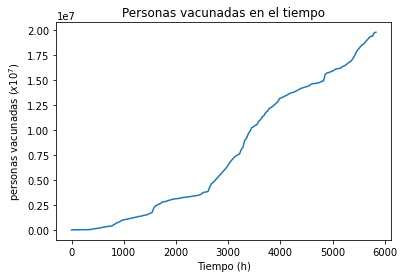

In [6]:
# Grafico de los datos

plt.figure()
plt.title("Personas vacunadas en el tiempo")
plt.plot(tiempo,colombia['people_fully_vaccinated'])
plt.xlabel("Tiempo (h)")
plt.ylabel("personas vacunadas $(x 10^7)$")
plt.show()

La curva que describe el fit esta dada por A*x^b
el valor de A sería 17.81 y de b sería 1.61


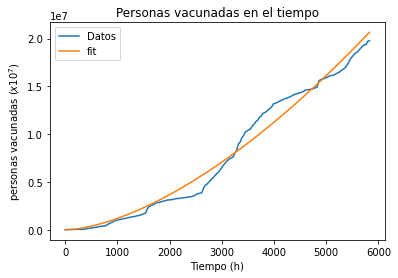

In [7]:
# Fit a los datos 

def func(x, A,b):                                                            # Función de población 
    return A*x**b

w , _ = optimize.curve_fit(func,tiempo,colombia['people_fully_vaccinated'])  # Fit 
print("La curva que describe el fit esta dada por A*x^b")
print("el valor de A sería {:.2f} y de b sería {:.2f}".format(w[0],w[1]))    # Valores de las constantes

# Valores de x and y del fit
x_lin = np.linspace(0,tiempo.max(),len(colombia['date']))                    # x
y_fitt = func(x_lin,*w)                                                      # y

# Grafico del fit 
plt.figure()
plt.title("Personas vacunadas en el tiempo")
plt.plot(tiempo,colombia['people_fully_vaccinated'],label="Datos")
plt.plot(x_lin,y_fitt,label="fit")
plt.xlabel("Tiempo (h)")
plt.ylabel("personas vacunadas $(x 10^7)$")
plt.legend()
plt.show()

## Calculo de la fecha en que todas las personas estarían vacunadas

Para hallar el momento en que todas las personas esten vacunadas, debemos hallar el instante $x$ en nuestra curva de fit en el cual se cumpla que:

$$ A*x^b = P $$             

Donde $P = 50372000$ es la cantidad de habitantes que tiene colombia en el año 2021, esta ecuación también se puede ver como

$$ A*x^b - P = 0 $$

Con esta ultima ecuación podemos usar la librería de scipy y su metodo de punto fijo para calcular el momento en el cual está ecuación se cumple, obtendiendo así $x$ en horas y posteriormente transformandolo a una fecha.

el número de horas que tardará la vacunacion es:  10143.282107214334


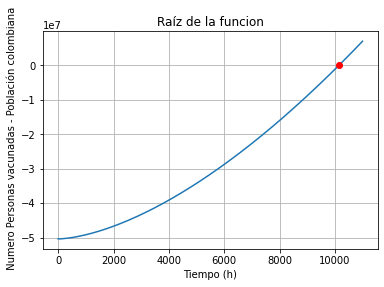

In [8]:
#Calculo de fecha en que todos estén vacunados

pob_col = 50372000                                      # Población colombiana

def fun_pob(x):                                         # Función de población (fit) para la poblacion colombiana
  return w[0] * x**w[1] - pob_col

α = optimize.fixed_point(fun_pob,10144,maxiter=2000)    # Calculo de la raíz 

x_lin2 = np.linspace(0,11000,len(colombia['date']))
y = fun_pob(x_lin2)

print("el número de horas que tardará la vacunacion es: ",α)

#grafica
plt.figure()
plt.title("Raíz de la funcion")
plt.plot(x_lin2,y,label="Funcion de población")
plt.plot(α,fun_pob(α),'ro',label="raíz")
plt.xlabel("Tiempo (h)")
plt.ylabel(" Numero Personas vacunadas - Población colombiana")
plt.grid()
plt.show()



In [9]:
#transformar las horas en fecha

dias = α / 24                                     # Num total de días de la vacunación
final_fin = f1 + dt.timedelta(days = dias)        # Calculo de la fecha final

print("""
La fecha esperada para que todos los colombianos estén 
totalmente vacunados sería en {} tardando desde su fecha
inicial {} un total de {:.1f} horas, es decir, {:.1f} días
""".format(final_fin,f1,α,dias))


La fecha esperada para que todos los colombianos estén 
totalmente vacunados sería en 2022-04-15 tardando desde su fecha
inicial 2021-02-17 un total de 10143.3 horas, es decir, 422.6 días



**Nota:**
La fecha puede ser algo imprecisa debido al hecho de que se debieron eliminar los valores NaN de los datos, pues reemplazar estos por 0 modificaría la información haciendo que esta sea menos confiable.


Para cumplir la fecha estimada de vacunación se debe
llevar cierto ritmo, es decir, se debe completar el
proceso de vacunación por día para cierto número de
personas, en el siguiente gráfico se puede observar 
aproximadamente que tendencía llevamos con esto.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


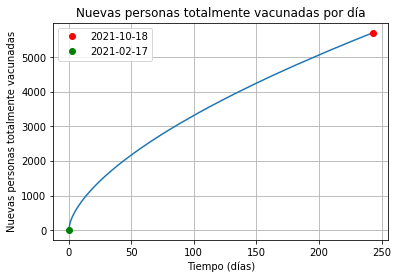

In [10]:
#Calculo de la velocidad de la vacunación

array_derivate=np.vectorize(misc.derivative)          # Se vectoriza la función derivative

velocidad = array_derivate(fun_pob,tiempo,dx=1E-8)    # Se calcula la velocidad 
velocidad[0] = 0                                      # Se cambia el primer valor diferente NaN 

print("""
Para cumplir la fecha estimada de vacunación se debe
llevar cierto ritmo, es decir, se debe completar el
proceso de vacunación por día para cierto número de
personas, en el siguiente gráfico se puede observar 
aproximadamente que tendencía llevamos con esto.
""")

t_d = tiempo / 24       #tiempo en días 

#Grafico
plt.figure()
plt.title("Nuevas personas totalmente vacunadas por día")
plt.plot(t_d,velocidad)
plt.plot(t_d.max(),velocidad.max(),'ro',label="2021-10-18")
plt.plot(t_d.min(),velocidad.min(),'go',label="2021-02-17")
plt.xlabel("Tiempo (días)")
plt.ylabel("Nuevas personas totalmente vacunadas")
plt.legend()
plt.grid()
plt.show()